In [120]:
import numpy as np
import pandas as pd
import json

import seaborn as sns
from scipy import stats
from statsmodels import robust

**Data Exploration**

In [121]:
file = open('E:/University Courses/CS 4440/CS4440-Assignment-master/CS4440-Assignment-master/Data/Timeseries_30.033_31.562_SA2_1kWp_crystSi_14_28deg_0deg_2019_2020.json')
data = json.load(file)
df = pd.json_normalize(data['outputs']['hourly'])

In [122]:
df.head()

,time,P,Gb(i),Gd(i),Gr(i),H_sun,T2m,WS10m,Int
0,20190101:0009,0.0,0.0,0.0,0.0,0.0,7.76,2.90,0.0
1,20190101:0109,0.0,0.0,0.0,0.0,0.0,7.21,2.90,0.0
2,20190101:0209,0.0,0.0,0.0,0.0,0.0,6.76,2.90,0.0
3,20190101:0309,0.0,0.0,0.0,0.0,0.0,6.29,2.97,0.0
4,20190101:0409,0.0,0.0,0.0,0.0,0.0,5.85,2.90,0.0


In [123]:
df.columns

Index(['time', 'P', 'Gb(i)', 'Gd(i)', 'Gr(i)', 'H_sun', 'T2m', 'WS10m', 'Int'], dtype='object')

In [124]:
df.drop('Int', inplace=True, axis=1)

In [125]:
df = df.rename(columns={'P':'PV Power Output', 'Gb(i)':'Direct In-plane Irradiance', 'Gd(i)':'Diffuse In-plane Irradiance', 
                  'Gr(i)':'Reflected In-plane Irradiance', 'H_sun':'Sun Height', 'T2m':'Air Temp', 'WS10m':
                  'Wind Speed 10m'})

In [126]:
df.describe()

,PV Power Output,Direct In-plane Irradiance,Diffuse In-plane Irradiance,Reflected In-plane Irradiance,Sun Height,Air Temp,Wind Speed 10m
count,17544.000000,17544.000000,17544.000000,17544.000000,17544.000000,17544.000000,17544.000000
mean,216.939652,204.627289,75.777261,3.072123,17.685180,21.047703,3.859257
std,288.651948,292.951529,93.928433,4.085460,23.113128,7.940073,1.744795
min,0.000000,0.000000,0.000000,0.000000,0.000000,2.160000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,14.740000,2.550000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,20.890000,3.660000
75%,478.527500,408.870000,153.602500,6.360000,34.260000,26.860000,4.970000
max,905.400000,1005.410000,486.810000,13.030000,82.750000,43.040000,12.970000


**Data Exploration & Visualization**

**Uni-variate Analysis**

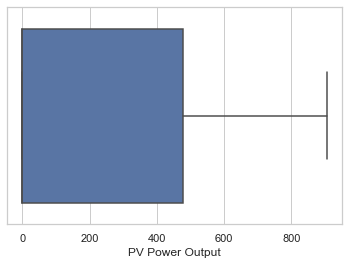

In [127]:
sns.set_theme(style='whitegrid')
pv_box = sns.boxplot(x=df['PV Power Output'])

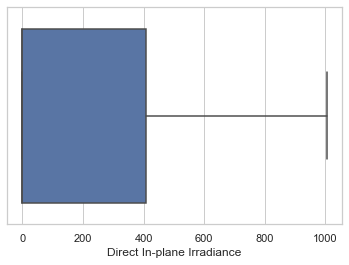

In [128]:
dir_inplane_irr_box = sns.boxplot(x=df['Direct In-plane Irradiance'])

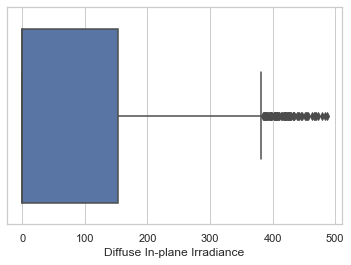

In [129]:
diffuse_inplane_irr_box = sns.boxplot(x=df['Diffuse In-plane Irradiance'])

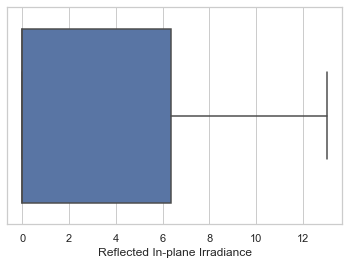

In [130]:
reflected_inplane_irr_box = sns.boxplot(x=df['Reflected In-plane Irradiance'])

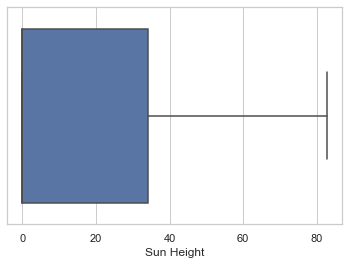

In [131]:
sun_height_box = sns.boxplot(x=df['Sun Height'])

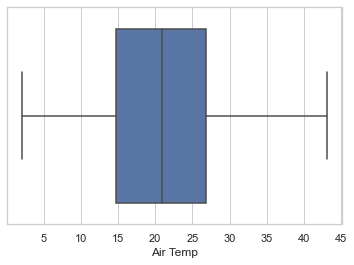

In [132]:
air_temp_box = sns.boxplot(x=df['Air Temp'])

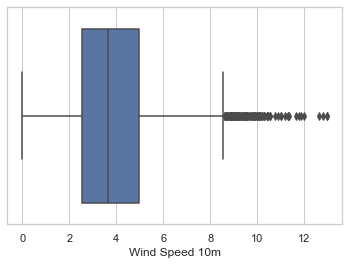

In [133]:
wind_sp_box = sns.boxplot(x=df['Wind Speed 10m'])

**Bi-variate Analysis**

In [134]:
df.corr()

,PV Power Output,Direct In-plane Irradiance,Diffuse In-plane Irradiance,Reflected In-plane Irradiance,Sun Height,Air Temp,Wind Speed 10m
PV Power Output,1.000000,0.983943,0.870672,0.969558,0.936368,0.340251,0.176114
Direct In-plane Irradiance,0.983943,1.000000,0.775787,0.964400,0.919178,0.367682,0.135549
Diffuse In-plane Irradiance,0.870672,0.775787,1.000000,0.849943,0.869784,0.304729,0.231795
Reflected In-plane Irradiance,0.969558,0.964400,0.849943,1.000000,0.982640,0.442536,0.160086
Sun Height,0.936368,0.919178,0.869784,0.982640,1.000000,0.447678,0.178098
Air Temp,0.340251,0.367682,0.304729,0.442536,0.447678,1.000000,0.234634
Wind Speed 10m,0.176114,0.135549,0.231795,0.160086,0.178098,0.234634,1.000000


In [135]:
df.cov()

,PV Power Output,Direct In-plane Irradiance,Diffuse In-plane Irradiance,Reflected In-plane Irradiance,Sun Height,Air Temp,Wind Speed 10m
PV Power Output,83319.947117,83203.234982,23606.211011,1143.376132,6247.120456,779.828032,88.697739
Direct In-plane Irradiance,83203.234982,85820.598520,21346.937076,1154.233645,6223.777137,855.249483,69.284732
Diffuse In-plane Irradiance,23606.211011,21346.937076,8822.550565,326.157928,1888.282551,227.266417,37.987855
Reflected In-plane Irradiance,1143.376132,1154.233645,326.157928,16.690982,92.788510,14.355367,1.141137
Sun Height,6247.120456,6223.777137,1888.282551,92.788510,534.216697,82.157869,7.182282
Air Temp,779.828032,855.249483,227.266417,14.355367,82.157869,63.044759,3.250566
Wind Speed 10m,88.697739,69.284732,37.987855,1.141137,7.182282,3.250566,3.044308


<AxesSubplot:xlabel='PV Power Output', ylabel='Direct In-plane Irradiance'>

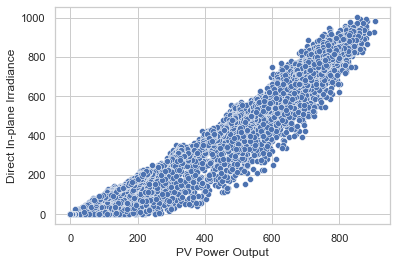

In [136]:
sns.scatterplot(data=df, x='PV Power Output', y='Direct In-plane Irradiance')

<AxesSubplot:xlabel='PV Power Output', ylabel='Diffuse In-plane Irradiance'>

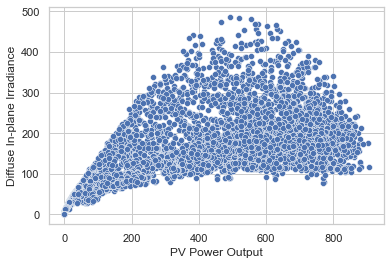

In [137]:
sns.scatterplot(data=df, x='PV Power Output', y='Diffuse In-plane Irradiance')

<AxesSubplot:xlabel='PV Power Output', ylabel='Reflected In-plane Irradiance'>

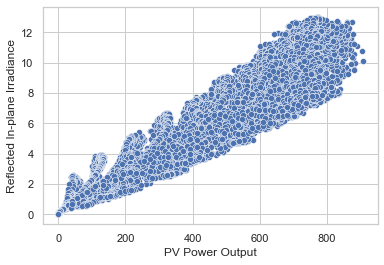

In [138]:
sns.scatterplot(data=df, x='PV Power Output', y='Reflected In-plane Irradiance')

<AxesSubplot:xlabel='PV Power Output', ylabel='Sun Height'>

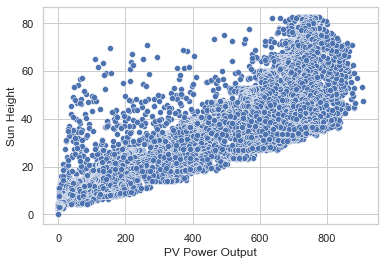

In [139]:
sns.scatterplot(data=df, x='PV Power Output', y='Sun Height')

<AxesSubplot:xlabel='PV Power Output', ylabel='Air Temp'>

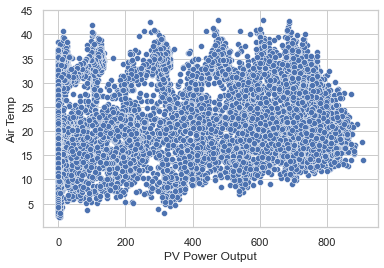

In [140]:
sns.scatterplot(data=df, x='PV Power Output', y='Air Temp')

<AxesSubplot:xlabel='PV Power Output', ylabel='Wind Speed 10m'>

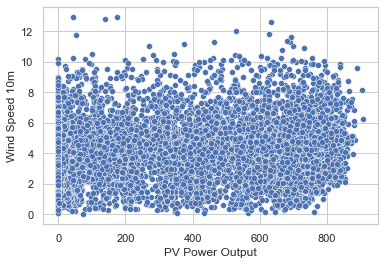

In [141]:
sns.scatterplot(data=df, x='PV Power Output', y='Wind Speed 10m')

<AxesSubplot:xlabel='PV Power Output', ylabel='Count'>

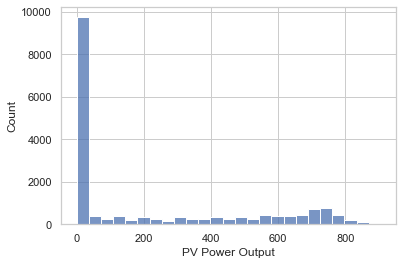

In [142]:
sns.histplot(data=df, x='PV Power Output')

<AxesSubplot:xlabel='Direct In-plane Irradiance', ylabel='Count'>

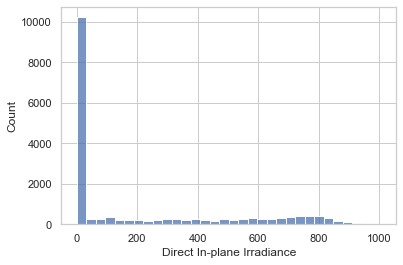

In [143]:
sns.histplot(data=df, x='Direct In-plane Irradiance')

<AxesSubplot:xlabel='Diffuse In-plane Irradiance', ylabel='Count'>

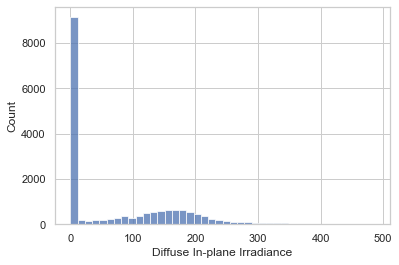

In [144]:
sns.histplot(data=df, x='Diffuse In-plane Irradiance')

<AxesSubplot:xlabel='Reflected In-plane Irradiance', ylabel='Count'>

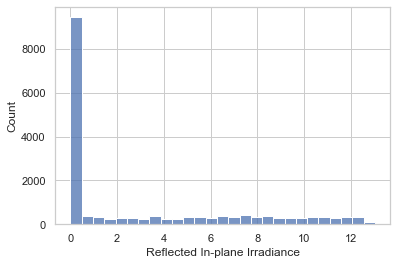

In [145]:
sns.histplot(data=df, x='Reflected In-plane Irradiance')

<AxesSubplot:xlabel='Sun Height', ylabel='Count'>

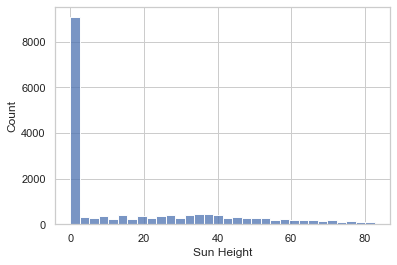

In [146]:
sns.histplot(data=df, x='Sun Height')

<AxesSubplot:xlabel='Air Temp', ylabel='Count'>

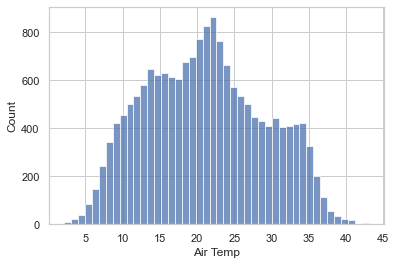

In [147]:
sns.histplot(data=df, x='Air Temp')

<AxesSubplot:xlabel='Wind Speed 10m', ylabel='Count'>

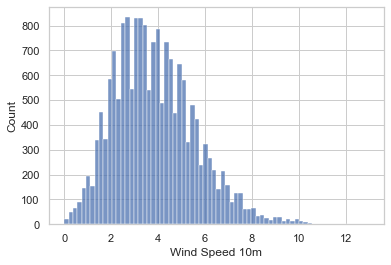

In [148]:
sns.histplot(data=df, x='Wind Speed 10m')

**Missing Value Treatment**

In [149]:
df.isnull().sum()
# NO MISSING VALUES, PROCEED

time                             0
PV Power Output                  0
Direct In-plane Irradiance       0
Diffuse In-plane Irradiance      0
Reflected In-plane Irradiance    0
Sun Height                       0
Air Temp                         0
Wind Speed 10m                   0
dtype: int64

**Outlier Detection & Treatment**

**Uni-variate Outliers**

In [150]:
stats.zscore(df['PV Power Output'])

0       -0.751583
1       -0.751583
2       -0.751583
3       -0.751583
4       -0.751583
           ...   
17539   -0.751583
17540   -0.751583
17541   -0.751583
17542   -0.751583
17543   -0.751583
Name: PV Power Output, Length: 17544, dtype: float64

In [151]:
stats.zscore(df['Direct In-plane Irradiance'])

0       -0.698522
1       -0.698522
2       -0.698522
3       -0.698522
4       -0.698522
           ...   
17539   -0.698522
17540   -0.698522
17541   -0.698522
17542   -0.698522
17543   -0.698522
Name: Direct In-plane Irradiance, Length: 17544, dtype: float64

In [152]:
stats.zscore(df['Diffuse In-plane Irradiance'])

0       -0.806778
1       -0.806778
2       -0.806778
3       -0.806778
4       -0.806778
           ...   
17539   -0.806778
17540   -0.806778
17541   -0.806778
17542   -0.806778
17543   -0.806778
Name: Diffuse In-plane Irradiance, Length: 17544, dtype: float64

In [153]:
stats.zscore(df['Reflected In-plane Irradiance'])

0       -0.751987
1       -0.751987
2       -0.751987
3       -0.751987
4       -0.751987
           ...   
17539   -0.751987
17540   -0.751987
17541   -0.751987
17542   -0.751987
17543   -0.751987
Name: Reflected In-plane Irradiance, Length: 17544, dtype: float64

In [154]:
stats.zscore(df['Air Temp'])

0       -1.673547
1       -1.742817
2       -1.799494
3       -1.858689
4       -1.914105
           ...   
17539   -0.837258
17540   -0.958168
17541   -1.087893
17542   -1.211321
17543   -1.299484
Name: Air Temp, Length: 17544, dtype: float64

In [155]:
stats.zscore(df['Sun Height'])

0       -0.765179
1       -0.765179
2       -0.765179
3       -0.765179
4       -0.765179
           ...   
17539   -0.765179
17540   -0.765179
17541   -0.765179
17542   -0.765179
17543   -0.765179
Name: Sun Height, Length: 17544, dtype: float64

In [156]:
stats.zscore(df['Wind Speed 10m'])

0       -0.549798
1       -0.549798
2       -0.549798
3       -0.509678
4       -0.549798
           ...   
17539   -0.790521
17540   -0.710280
17541   -0.790521
17542   -0.945271
17543   -1.105753
Name: Wind Speed 10m, Length: 17544, dtype: float64

**Multi-variate Outliers**

**Mahalanobis Distance**

In [157]:
import scipy
def mahalanobis(x=None, data=None, cov=None):
    x_minus_mu = x - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
    inv_covmat = scipy.linalg.inv(cov)
    left_term = np.dot(x_minus_mu, inv_covmat)
    mahal = np.dot(left_term, x_minus_mu.T)
    return mahal.diagonal()

In [158]:
df_x = df[['PV Power Output', 'Direct In-plane Irradiance'
                                             , 'Diffuse In-plane Irradiance', 'Reflected In-plane Irradiance'
                                             , 'Sun Height', 'Air Temp', 'Wind Speed 10m']]
df_x['Mahalanobis'] = mahalanobis(x=df_x, data=df[['PV Power Output', 'Direct In-plane Irradiance'
                                             , 'Diffuse In-plane Irradiance', 'Reflected In-plane Irradiance'
                                             , 'Sun Height', 'Air Temp', 'Wind Speed 10m']])

C:\Users\Islam.Anwar\Anaconda3\envs\analytics\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [159]:
df_x.head()

,PV Power Output,Direct In-plane Irradiance,Diffuse In-plane Irradiance,Reflected In-plane Irradiance,Sun Height,Air Temp,Wind Speed 10m,Mahalanobis
0,0.0,0.0,0.0,0.0,0.0,7.76,2.90,3.784174
1,0.0,0.0,0.0,0.0,0.0,7.21,2.90,4.123177
2,0.0,0.0,0.0,0.0,0.0,6.76,2.90,4.414357
3,0.0,0.0,0.0,0.0,0.0,6.29,2.97,4.761355
4,0.0,0.0,0.0,0.0,0.0,5.85,2.90,5.041178


In [160]:
from scipy.stats import chi2
chi2.ppf((1-0.01), df=2)

9.21034037197618

In [161]:
df_x['P value'] = 1 - chi2.cdf(df_x['Mahalanobis'], 2)

In [162]:
df_x.loc[df_x['P value'] < 0.01].head(10)

,PV Power Output,Direct In-plane Irradiance,Diffuse In-plane Irradiance,Reflected In-plane Irradiance,Sun Height,Air Temp,Wind Speed 10m,Mahalanobis,P value
8,671.03,637.45,173.17,6.42,30.96,13.39,3.66,12.362390,2.067955e-03
9,764.29,775.75,162.03,7.55,35.72,14.64,3.86,15.042657,5.414129e-04
10,723.01,649.96,232.27,7.34,36.88,15.60,4.55,10.707274,4.730914e-03
11,612.03,471.57,267.46,6.33,34.20,16.06,4.90,10.822679,4.465654e-03
12,635.67,622.63,145.00,5.90,28.20,16.20,4.97,12.712586,1.735789e-03
31,508.97,424.44,169.46,4.55,23.38,11.10,5.93,10.738885,4.656728e-03
32,690.83,647.69,167.10,6.44,30.99,12.49,6.41,18.796167,8.288275e-05
33,778.98,759.62,170.32,7.52,35.78,14.07,6.97,21.602319,2.037586e-05
34,789.54,754.76,185.46,7.67,36.97,15.21,8.69,24.815074,4.087663e-06
35,204.69,16.87,235.46,3.10,34.32,15.64,9.59,27.721029,9.559935e-07


**Feature Engineering**

In [163]:
from sklearn.feature_selection import VarianceThreshold

numeric_features = df.iloc[:, 1:]
numeric_features.columns

vt = VarianceThreshold()
vt.fit_transform(numeric_features)

vt.get_support()

array([ True,  True,  True,  True,  True,  True,  True])

**Data Transformation & Preprocessing**

In [164]:
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.preprocessing import RobustScaler



X = df.iloc[:, 2:]
y = df.iloc[:, 1]

X = np.asarray(X)
y = np.asarray(y)

transformer = RobustScaler().fit(X)
X = transformer.transform(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

    


**Model Selection, Fitting & Predictions**

Linear Regression, SVR, MLP, kNN, RF, Gradient Boost, Lasso Regression

In [165]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

'''Model Creation'''
linReg = LinearRegression(fit_intercept=False) 
svr = SVR(C=200, epsilon=5) 
mlp = MLPRegressor(epsilon=1e-8, max_iter=1000)
knr = KNeighborsRegressor(n_neighbors=6)
rf = RandomForestRegressor(n_estimators=20, max_depth=10)
gbReg = GradientBoostingRegressor(random_state=0)

poly = PolynomialFeatures(3)
X_poly = poly.fit_transform(X)
X_poly_train, X_poly_test, y_poly_train, y_poly_test = train_test_split(X_poly, y, test_size=0.2, random_state=21)
lasso = Lasso(fit_intercept=False, alpha=0.01)

'''Fitting Models'''
linReg.fit(X_train, y_train)
svr.fit(X_train, y_train)
mlp.fit(X_train, y_train)
knr.fit(X_train, y_train)
rf.fit(X_train, y_train)
gbReg.fit(X_train, y_train)
lasso.fit(X_poly_train, y_poly_train)

'''Predictions'''
y_pred_linReg = linReg.predict(X_test)
y_pred_svr = svr.predict(X_test)
y_pred_mlp = mlp.predict(X_test)
y_pred_knr = knr.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_gbReg = gbReg.predict(X_test)
y_pred_lasso = lasso.predict(X_poly_test)


C:\Users\Islam.Anwar\Anaconda3\envs\analytics\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


**Model Evaluation**

Coefficient of Determination, RMSE, MAE

In [166]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

r2_linReg = r2_score(y_test, y_pred_linReg)
r2_svr = r2_score(y_test, y_pred_svr)
r2_mlp = r2_score(y_test, y_pred_mlp)
r2_knr = r2_score(y_test, y_pred_knr)
r2_rf = r2_score(y_test, y_pred_rf)
r2_gbReg = r2_score(y_test, y_pred_gbReg)
r2_lasso = r2_score(y_poly_test, y_pred_lasso)

rmse_linReg = mean_squared_error(y_test, y_pred_linReg, squared = False)
rmse_svr = mean_squared_error(y_test, y_pred_svr, squared = False)
rmse_mlp = mean_squared_error(y_test, y_pred_mlp, squared = False)
rmse_knr = mean_squared_error(y_test, y_pred_knr, squared = False)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared = False)
rmse_gbReg = mean_squared_error(y_test, y_pred_gbReg, squared = False)
rmse_lasso = mean_squared_error(y_poly_test, y_pred_lasso, squared = False)

mae_linReg = mean_absolute_error(y_test, y_pred_linReg)
mae_svr = mean_absolute_error(y_test, y_pred_svr)
mae_mlp = mean_absolute_error(y_test, y_pred_mlp)
mae_knr = mean_absolute_error(y_test, y_pred_knr)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mae_gbReg = mean_absolute_error(y_test, y_pred_gbReg)
mae_lasso = mean_absolute_error(y_poly_test, y_pred_lasso)


In [167]:
print(r2_linReg)
print(rmse_linReg)
print(mae_linReg)

0.998677928665525
10.602277257968568
7.936486951985802


In [168]:
print(r2_svr)
print(rmse_svr)
print(mae_svr)

0.9999081551074577
2.7944684965045594
2.2947811517698753


In [169]:
print(r2_mlp)
print(rmse_mlp)
print(mae_mlp)

0.9999780808438811
1.3651602295398615
0.848400331658269


In [170]:
print(r2_knr)
print(rmse_knr)
print(mae_knr)

0.9981635213628224
12.495816907301613
5.9339631423957435


In [171]:
print(r2_rf)
print(rmse_rf)
print(mae_rf)

0.9994565135257353
6.797763998886891
3.3172650965425303


In [172]:
print(r2_gbReg)
print(rmse_gbReg)
print(mae_gbReg)

0.9994062534405868
7.1051338825404
3.9060753935519252


In [173]:
print(r2_lasso)
print(rmse_lasso)
print(mae_lasso)

0.9998833748027401
3.148965542675185
1.8324980526764842


[Text(0.5, 0, 'Models'), Text(0, 0.5, 'R Squared')]

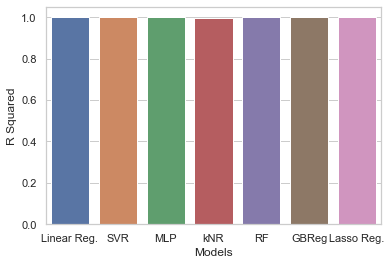

In [174]:
r2_scores = [r2_linReg, r2_svr, r2_mlp, r2_knr, r2_rf, r2_gbReg, r2_lasso]
rmse_scores = [rmse_linReg, rmse_svr, rmse_mlp, rmse_knr, rmse_rf, rmse_gbReg, rmse_lasso]
mae_scores = [mae_linReg, mae_svr, mae_mlp, mae_knr, mae_rf, mae_gbReg, mae_lasso]
labels = ['Linear Reg.', 'SVR', 'MLP', 'kNR', 'RF', 'GBReg', 'Lasso Reg.']

sns.set_theme(style="whitegrid")
r_squared_scores = sns.barplot(x=labels, y=r2_scores, label='r2 score')
r_squared_scores.set(xlabel='Models', ylabel='R Squared')

[Text(0.5, 0, 'Models'), Text(0, 0.5, 'Mean Squared Error')]

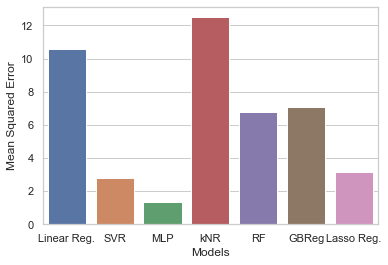

In [175]:
rmse_scores = sns.barplot(x=labels, y=rmse_scores, label='RMSE')
rmse_scores.set(xlabel='Models', ylabel='Mean Squared Error')

[Text(0.5, 0, 'Models'), Text(0, 0.5, 'Mean Absolute Error')]

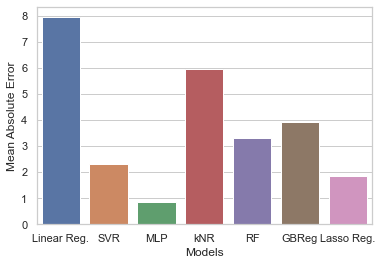

In [176]:
mae_scores = sns.barplot(x=labels, y=mae_scores, label='MAE')
mae_scores.set(xlabel='Models', ylabel='Mean Absolute Error')